## 随机数生成

[参考1](https://www.cnblogs.com/liangxuran/p/15897306.html)

理论待补充...


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### [参考2](https://zhuanlan.zhihu.com/p/38704136)

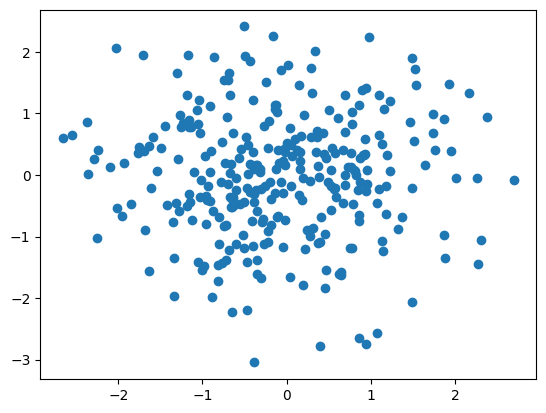

In [2]:
num, dim=300,2
np.random.seed(0)
x=np.random.randn(num, dim)
plt.scatter(x[:,0],x[:,1])

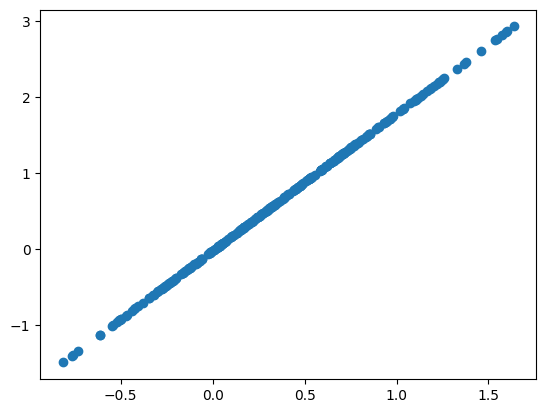

In [3]:
C=[[0.3535,0.6364],[0.3535,0.6364]]
W = [0.4,0.7]

Z=np.dot(x,C)+W
plt.scatter(Z[:,0],Z[:,1])

[0.37171516 0.77276512]
[0.49921738 0.89476648]


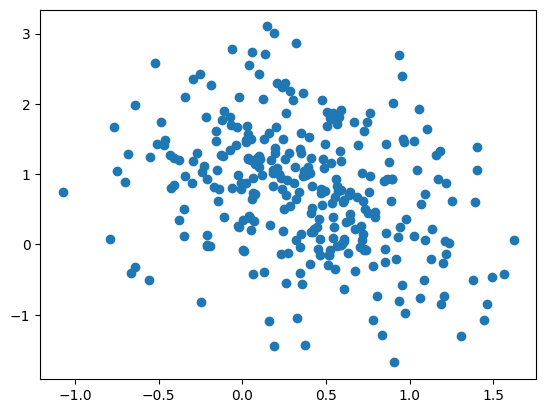

In [5]:
C=[[0.2,-0.88],[0.458,0.1]]
W = [0.4,0.7]

Z=np.dot(x,C)+W
plt.scatter(Z[:,0],Z[:,1])
print(np.mean(Z, axis=0))
print(np.std(Z, axis=0))

### [参考3](https://www.zhihu.com/question/288946037/answer/649328934)

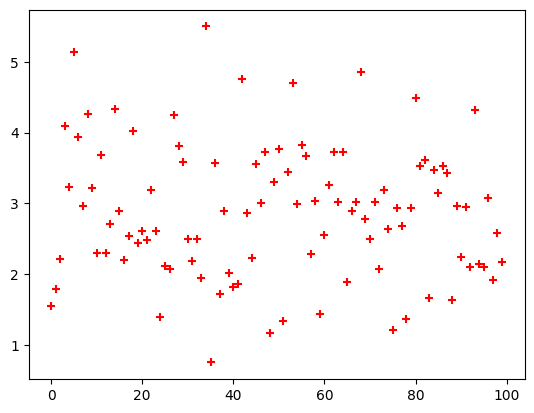

0.886683824867312


In [7]:
# 一维
mean = np.array([3])
cov = np.eye(1)
dot_num = 100
Y = np.random.multivariate_normal(mean,cov,dot_num)
X = np.linspace(0,dot_num-1,dot_num)
plt.scatter(X,Y,c='r',marker='+')
plt.show()
print(np.var(Y))

0.8349722465463294 0.9381040003312989


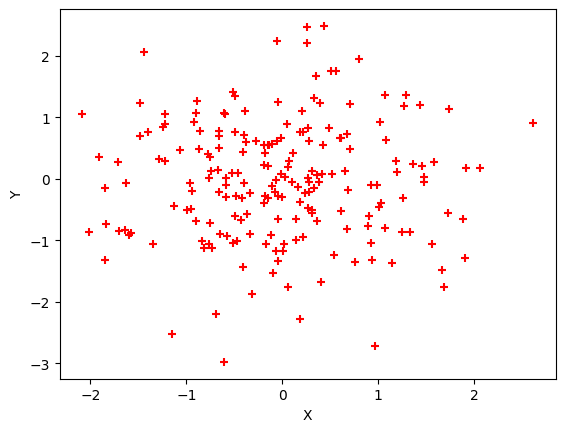

In [22]:
# 二维
mean = np.array([0,0])
cov = np.eye(2) # 协方差cov(X,Y)=0, 方差D(X)=D(Y)=1
dot_num = 200
#len(mean)=2 # 所以生成的正太矩阵维度为 dot_num*len(mean)=300*2
f_xy = np.random.multivariate_normal(mean,cov,dot_num)
print(np.var(f_xy[:,0]), np.var(f_xy[:,1]))
plt.scatter(f_xy[:,0],f_xy[:,1],c='r',marker='+')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### [参考4: 截断正态分布](https://www.zhangjunbk.com/article/23244)

参数`normed`改为`density`:[参考](https://github.com/googlecolab/colabtools/issues/1120),
该参数的作用:[参考](https://stackoverflow.com/questions/45888179/why-doesnt-the-normed-parameter-for-matplotlib-histograms-do-anything)

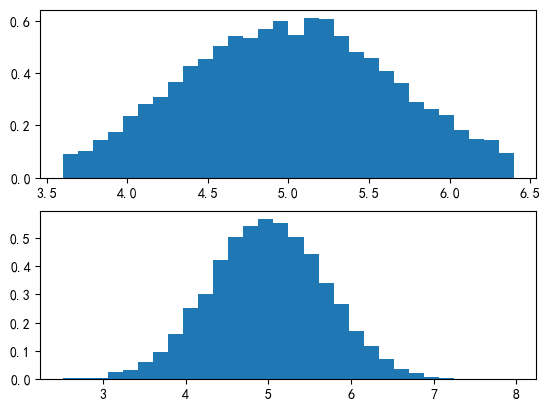

In [27]:
from pylab import *
from scipy import stats
mu, sigma = 5, 0.7
lower, upper = mu - 2 * sigma, mu + 2 * sigma  # 截断在[μ-2σ, μ+2σ]
X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
N = stats.norm(loc=mu, scale=sigma)


figure(1)
subplot(2,1,1)
plt.hist(X.rvs(10000), density=True, bins=30)   # 截断正态分布的直方图
subplot(2,1,2)
plt.hist(N.rvs(10000), density=True, bins=30)   # 常规正态分布的直方图
plt.show()

### [截断对数正态分布](https://blog.csdn.net/CSDNBigBoy/article/details/98782631)

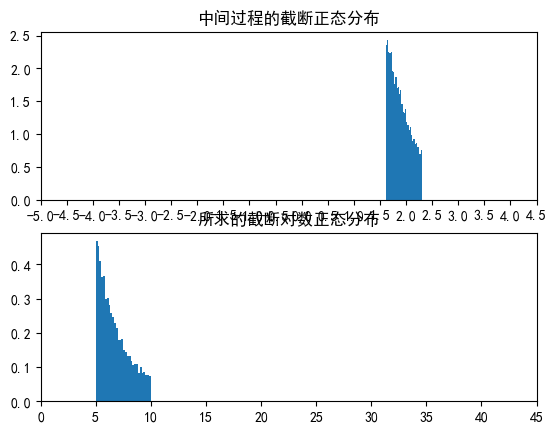

In [28]:
from matplotlib import rcParams
# 设置matplotlib正常显示中文和负号
rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
rcParams['axes.unicode_minus'] = False  # 正常显示负号
 
# region 【功能函数】生成截断对数正态分布，要求对数正态在[log_lower,log_upper]
def get_trunc_lognorm(mu, sigma, log_lower, log_upper=np.inf, data_num=10000):
    norm_lower = np.log(log_lower)
    norm_upper = np.log(log_upper)
    X = stats.truncnorm((norm_lower - mu) / sigma, (norm_upper - mu) / sigma, loc=mu, scale=sigma)
    norm_data = X.rvs(data_num)
    log_data = np.exp(norm_data)
    return norm_data, log_data
# endregion
 
mu, sigma = 0, 1
norm_data, log_data = get_trunc_lognorm(mu, sigma, 5, 10)
 
figure(4)
subplot(2, 1, 1)
plt.hist(norm_data, density=1, bins=30)
plt.xticks(np.arange(mu - 5 * sigma, mu + 5 * sigma, 0.5))
plt.title("中间过程的截断正态分布")
 
subplot(2, 1, 2)
plt.hist(log_data, density=1, bins=30)
plt.xticks(np.arange(0, 50, 5))
# plt.xlim(0,50)
plt.title("所求的截断对数正态分布")
plt.show()